# TPOT INSTALLATION

In [3]:
#intall tpot
pip install tpot

     |████████████████████████████████| 92kB 1.5MB/s eta 0:00:01
     |████████████████████████████████| 7.9MB 1.8MB/s eta 0:00:01
     |████████████████████████████████| 112kB 192kB/s eta 0:00:01
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11958 sha256=94ccc8109431dc3ae91792b57ba27237ff6e582536fba991348e2b017c4d9d84
  Stored in directory: /Users/firlisaanggraeni/Library/Caches/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
Note: you may need to restart the kernel to use updated packages.


# Import Library

In [1]:
#Import Library

import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd 
pd.options.mode.chained_assignment = None
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.display import Image
from matplotlib import style
from scipy import stats
from six import StringIO
from sklearn import preprocessing,svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

%matplotlib inline
plt.style.use("ggplot")

/Users/firlisaanggraeni/opt/anaconda3/lib/python3.7/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
#Mounting drive
# from google.colab import drive
# drive.mount('/content/drive')

# Eksplorasi Data

In [3]:
#load data salju_train.csv
df = pd.read_csv('weatherAUS.csv')
 
#menampilkan 5 data pertama
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#menampilkan detail info dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [5]:
#Menampilkan presentase missing value setiap fitur
df.isna().sum()/len(df) * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [6]:
#menampilkan tuple dimensi array
df.shape

(145460, 23)

In [7]:
#Menampilkan kolom nyang bertipe numerik
df._get_numeric_data().columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

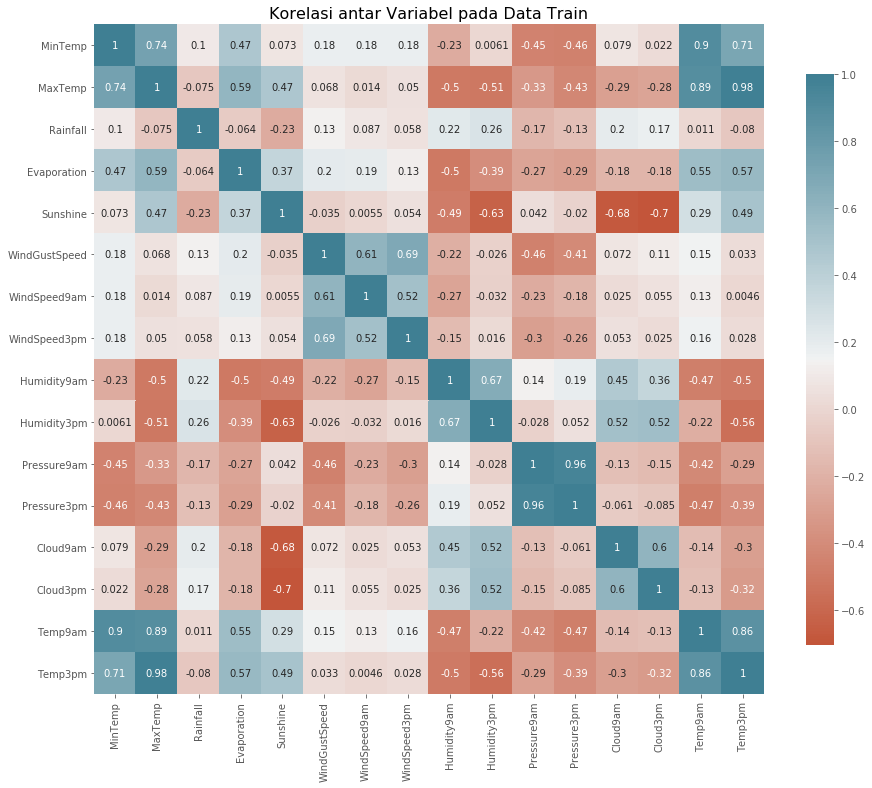

In [8]:
#korelasi antar variabel numeric
corr = df.corr()
f, ax = plt.subplots(figsize=(15,15))
plt.title('Korelasi antar Variabel pada Data Train', y=1, size=16)
ax = sns.heatmap(corr,
                 square=True, 
                 #vmax=0.8,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 annot=True,
                 cbar_kws={'shrink': .7}
                 )

In [9]:
#Menampilkan tabel korelasi antar variabel
df_corr = df.corr()
df_corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


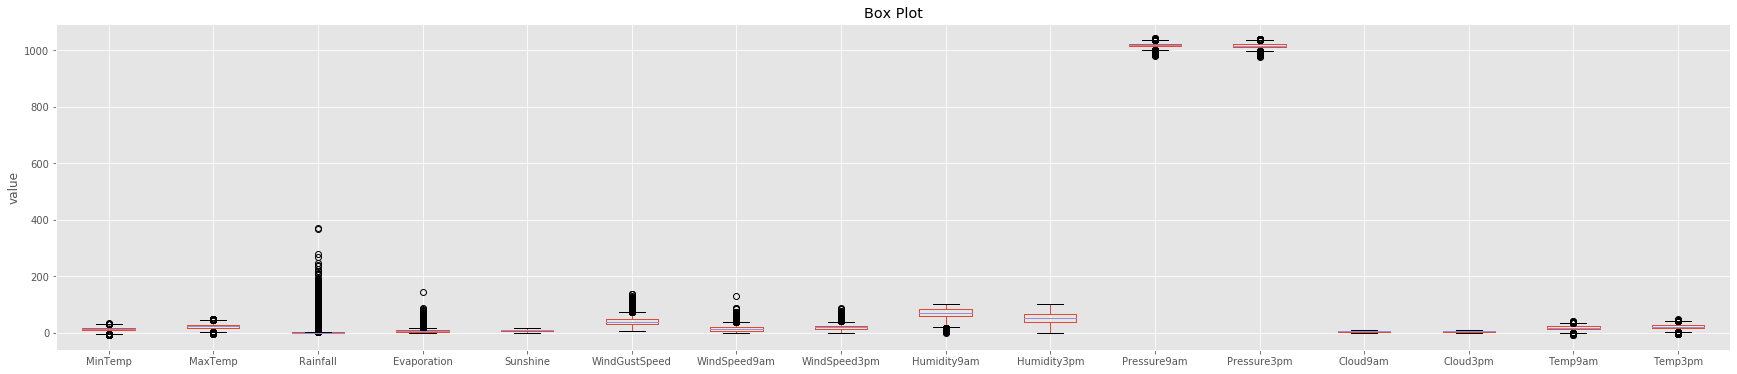

In [10]:
df.plot(kind="box",
              figsize=(30, 6))

plt.title('Box Plot')
plt.ylabel('value')

plt.show()

# Preprocessing Data

In [11]:
#Melihat jumlah null setiap fitur
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [12]:
#Mengubah tipe data fitur Date menjadi datetime
df["Date"] = pd.to_datetime(df["Date"],dayfirst=True)

In [13]:
# Mengubah fitur Date menjadi index
df.set_index("Date", inplace=True)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [14]:
#Persentase missing value
df.isna().sum()/len(df) * 100

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [15]:
#Drop missing value pada label target
df = df[df['RainTomorrow'].notna()]

In [16]:
#Menampung nama fitur yang memiliki nilai nan pada row pertama dan persentase missing value > 10%
fitur_nan = ["Evaporation","Sunshine","Cloud3pm"]

In [17]:
#Handling Missing Values

for i in df.columns:
  cek = df[i].isna().sum()/len(df) * 100                
  if cek <10 :                                            #Menangani missing value yang memiliki persentase dibawah 10% dengan drop data
    # df[i].fillna(df[i].mode()[0], inplace=True)
    df = df[df[i].notna()]
  elif cek>10:
    if i in fitur_nan:                                    #Menangani missing value yang memiliki persentase diatas 10% dan nilai baris pertama adalah null dengan modus
      print(i)
      df[i].fillna(df[i].mode()[0], inplace=True)
    else :                                                #Menangani missing value yang memiliki persentase diatas 10% dengan nilai row sebelumnya
      df[i] = df[i].astype(str)
      df[i] = df[i].replace({np.nan: "?","nan": "?"})
      for j in range(len(df)):
        if df[i][j] != "?" : 
          prev = df[i][j]
        else:
          df[i][j] = prev
      df[i] = df[i].astype(float)



Evaporation
Sunshine
Cloud3pm


In [18]:
#Persentase missing value
df.isna().sum()/len(df) * 100

Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [19]:
#Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112925 entries, 2008-12-01 to 2017-06-24
Data columns (total 22 columns):
Location         112925 non-null object
MinTemp          112925 non-null float64
MaxTemp          112925 non-null float64
Rainfall         112925 non-null float64
Evaporation      112925 non-null float64
Sunshine         112925 non-null float64
WindGustDir      112925 non-null object
WindGustSpeed    112925 non-null float64
WindDir9am       112925 non-null object
WindDir3pm       112925 non-null object
WindSpeed9am     112925 non-null float64
WindSpeed3pm     112925 non-null float64
Humidity9am      112925 non-null float64
Humidity3pm      112925 non-null float64
Pressure9am      112925 non-null float64
Pressure3pm      112925 non-null float64
Cloud9am         112925 non-null float64
Cloud3pm         112925 non-null float64
Temp9am          112925 non-null float64
Temp3pm          112925 non-null float64
RainToday        112925 non-null object
RainTomorrow     

In [20]:
#MELAKUKAN LABEL ENCODER UNTUK KOLOM YANG BERTIPE OBJECT
#mendefinisikan labelencoder
label_encoder = preprocessing.LabelEncoder()

#encode kolom bertipe object
df['Location'] = label_encoder.fit_transform(df['Location'])
df['WindGustDir'] = label_encoder.fit_transform(df['WindGustDir'])
df['WindDir9am'] = label_encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = label_encoder.fit_transform(df['WindDir3pm'])
df['RainToday'] = label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])

In [32]:
#Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106048 entries, 2008-12-01 to 2017-06-24
Data columns (total 22 columns):
Location         106048 non-null int64
MinTemp          106048 non-null float64
MaxTemp          106048 non-null float64
Rainfall         106048 non-null float64
Evaporation      106048 non-null float64
Sunshine         106048 non-null float64
WindGustDir      106048 non-null int64
WindGustSpeed    106048 non-null float64
WindDir9am       106048 non-null int64
WindDir3pm       106048 non-null int64
WindSpeed9am     106048 non-null float64
WindSpeed3pm     106048 non-null float64
Humidity9am      106048 non-null float64
Humidity3pm      106048 non-null float64
Pressure9am      106048 non-null float64
Pressure3pm      106048 non-null float64
Cloud9am         106048 non-null float64
Cloud3pm         106048 non-null float64
Temp9am          106048 non-null float64
Temp3pm          106048 non-null float64
RainToday        106048 non-null int64
RainTomorrow     10604

In [21]:
#Handling Outliers dengan menggunakan 3 standard deviation untuk remove outliers fitur non-object

temp = df
fitur_obj = ["Location",'WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for i in df.columns:
  cek = i in fitur_obj
  if cek==False:
    up_limit = df[i].mean() + 3*df[i].std()
    low_limit = df[i].mean() - 3*df[i].std()
    df = df[(df[i]<up_limit) & (df[i]>low_limit)]
    print("Jumlah Outliers ", i)
    print(len(temp[i]) - len(df[i]))
    print()

Jumlah Outliers  MinTemp
12

Jumlah Outliers  MaxTemp
69

Jumlah Outliers  Rainfall
1986

Jumlah Outliers  Evaporation
3467

Jumlah Outliers  Sunshine
3467

Jumlah Outliers  WindGustSpeed
4536

Jumlah Outliers  WindSpeed9am
5300

Jumlah Outliers  WindSpeed3pm
5888

Jumlah Outliers  Humidity9am
6232

Jumlah Outliers  Humidity3pm
6232

Jumlah Outliers  Pressure9am
6650

Jumlah Outliers  Pressure3pm
6807

Jumlah Outliers  Cloud9am
6807

Jumlah Outliers  Cloud3pm
6807

Jumlah Outliers  Temp9am
6825

Jumlah Outliers  Temp3pm
6877



In [22]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,1,13.4,22.9,0.6,4.0,0.0,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
2008-12-02,1,7.4,25.1,0.0,4.0,0.0,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,8.0,7.0,17.2,24.3,0,0
2008-12-03,1,12.9,25.7,0.0,4.0,0.0,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
2008-12-04,1,9.2,28.0,0.0,4.0,0.0,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0
2008-12-05,1,17.5,32.3,1.0,4.0,0.0,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,36,3.5,21.8,0.0,4.0,0.0,0,31.0,2,0,...,59.0,27.0,1024.7,1021.2,8.0,7.0,9.4,20.9,0,0
2017-06-21,36,2.8,23.4,0.0,4.0,0.0,0,31.0,9,1,...,51.0,24.0,1024.6,1020.3,8.0,7.0,10.1,22.4,0,0
2017-06-22,36,3.6,25.3,0.0,4.0,0.0,6,22.0,9,3,...,56.0,21.0,1023.5,1019.1,8.0,7.0,10.9,24.5,0,0


In [23]:
#Convert data ke csv
df.to_csv('datasethasileksplorasi_1301184103_1301184116.csv', index=False, header=True)

# Splitting Data

In [75]:
#Split data dengan data target adalah fitur RainTomorrow
X = df.loc[:, df.columns != 'RainTomorrow']
Y = df["RainTomorrow"]
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, shuffle=False)

In [76]:
#Menampilkan panjang data hasil splitting
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

79536 79536
26512 26512


# Permodelan

In [88]:
#Membuat function permodelan untuk melakukan trainig, testing dann menampilkan akurasi dari setiap hasil testing
def permodelan(x_train, x_test, y_train, y_test):
    
    #memanggil function tpot
    tpot = TPOTClassifier(
                          generations=5, 
                          population_size=30, 
                          cv=5, 
                          random_state=40, 
                          verbosity=2, 
                          n_jobs=1)
    #training model
    model = tpot.fit(x_train, y_train)
    #prediksi data train
    train_pred = model.predict(x_train)
    #Evaluasi model untuk data train
    train_acc = model.score(x_train, y_train)
    train_f1 = f1_score(y_train, train_pred)
    train_precision = precision_score(y_train, train_pred)
    train_recall = recall_score(y_train, train_pred)
    
    #prediksi data test
    test_pred = model.predict(x_test)
    #Evaluasi model untuk data test
    test_acc = model.score(x_test, y_test)
    test_f1 = f1_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)

    print("==== Training Performance ====")
    print("Accuracy Score:", train_acc)
    
    
    print()
    print("==== Test Performance ====")
    print("Accuracy Score:", test_acc)
    
    
    print()
    print("==== Classification Report ====")
    print(classification_report(y_test, test_pred))

    print()
    print("==== Confusion Matrix ====")
    print(confusion_matrix(y_test, test_pred))
    return test_acc, test_recall, model, train_pred, test_pred

In [25]:
#Memanggil function permodelan
test_acc, test_recall, model, train_pred, test_pred = permodelan(x_train, x_test, y_train, y_test)


Generation 1 - Current best internal CV score: 0.8462331142486346

Generation 2 - Current best internal CV score: 0.8462331142486346

Generation 3 - Current best internal CV score: 0.8462331142486346

Generation 4 - Current best internal CV score: 0.8462456904911168

Generation 5 - Current best internal CV score: 0.8462456904911168

Best pipeline: RandomForestClassifier(SelectFwe(input_matrix, alpha=0.039), bootstrap=True, criterion=gini, max_features=0.5, min_samples_leaf=7, min_samples_split=15, n_estimators=100)
==== Training Performance ====
Accuracy Score: 0.9148813116073224

==== Test Performance ====
Accuracy Score: 0.867343089921545

==== Classification Report ====
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     21501
           1       0.76      0.44      0.55      5011

    accuracy                           0.87     26512
   macro avg       0.82      0.70      0.74     26512
weighted avg       0.86      0.87      0.85  

In [26]:
#Menampilkan akurasi dari data test, recall data test, model, prediksi dari data train dan prediksi dari data test
print(test_acc, test_recall, model, train_pred, test_pred )

0.867343089921545 0.4354420275394133 TPOTClassifier(generations=5, population_size=30, random_state=40, verbosity=2) [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]


In [28]:
#Membuat dataframe untuk hasil prediksi data test
data = pd.DataFrame()
data["y_actual"] = y_test
data["y_pred"] = test_pred

In [29]:
#Convert data ke csv
data.to_csv('predicted.csv', index=False, header=True)

In [ ]:
#Membuat dataframe untuk hasil prediksi data train
datatrain = pd.DataFrame()
datatrain["actual_train"] = y_train
datatrain["train_pred"] = test_pred

# Eksperimen

## Eksperimen 1
Mengubah preprocessing data untuk missing values menjadi mengatasi missing values yang memiliki persentase dibawah 10% dengan nilai modus dan splitting data menjadi 80% dan 20%

In [92]:
#load data salju_train.csv
df_exp1 = pd.read_csv('weatherAUS.csv')
 
#menampilkan 5 data pertama
df_exp1.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [93]:
#Mengubah tipe data fitur Date menjadi datetime
df_exp1["Date"] = pd.to_datetime(df_exp1["Date"],dayfirst=True)

# Mengubah fitur Date menjadi index
df_exp1.set_index("Date", inplace=True)

#Drop missing value pada label target
df_exp1= df_exp1[df_exp1['RainTomorrow'].notna()]

#Menampung nama fitur yang memiliki nilai nan pada row pertama dan persentase missing value > 10%
fitur_nan = ["Evaporation","Sunshine","Cloud3pm"]

df_exp1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No


In [94]:
#Handling Missing Values

for i in df_exp1.columns:
  cek = df_exp1[i].isna().sum()/len(df_exp1) * 100                
  if cek <10 :                                            #Menangani missing value yang memiliki persentase dibawah 10% dengan nilai modus
    df_exp1[i].fillna(df_exp1[i].mode()[0], inplace=True)
  elif cek>10:
    if i in fitur_nan:                                    #Menangani missing value yang memiliki persentase diatas 10% dan nilai baris pertama adalah null dengan modus
      print(i)
      df_exp1[i].fillna(df_exp1[i].mode()[0], inplace=True)
    else :                                                #Menangani missing value yang memiliki persentase diatas 10% dengan nilai row sebelumnya
      df_exp1[i] = df_exp1[i].astype(str)
      df_exp1[i] = df_exp1[i].replace({np.nan: "?","nan": "?"})
      for j in range(len(df_exp1)):
        if df_exp1[i][j] != "?" : 
          prev = df_exp1[i][j]
        else:
          df_exp1[i][j] = prev
      df_exp1[i] = df_exp1[i].astype(float)




Evaporation
Sunshine
Cloud3pm


In [95]:
#Handling Outliers dengan menggunakan 3 standard deviation untuk remove outliers fitur non-object

temp = df_exp1
fitur_obj = ["Location",'WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for i in df.columns:
  cek = i in fitur_obj
  if cek==False:
    up_limit = df_exp1[i].mean() + 3*df_exp1[i].std()
    low_limit = df_exp1[i].mean() - 3*df_exp1[i].std()
    df_exp1 = df_exp1[(df_exp1[i]<up_limit) & (df_exp1[i]>low_limit)]
    print("Jumlah Outliers ", i)
    print(len(temp[i]) - len(df_exp1[i]))
    print()

Jumlah Outliers  MinTemp
25

Jumlah Outliers  MaxTemp
329

Jumlah Outliers  Rainfall
2752

Jumlah Outliers  Evaporation
4768

Jumlah Outliers  Sunshine
4768

Jumlah Outliers  WindGustSpeed
6272

Jumlah Outliers  WindSpeed9am
7133

Jumlah Outliers  WindSpeed3pm
7787

Jumlah Outliers  Humidity9am
8212

Jumlah Outliers  Humidity3pm
8212

Jumlah Outliers  Pressure9am
8838

Jumlah Outliers  Pressure3pm
9116

Jumlah Outliers  Cloud9am
9116

Jumlah Outliers  Cloud3pm
9116

Jumlah Outliers  Temp9am
9163

Jumlah Outliers  Temp3pm
9368



In [96]:
#MELAKUKAN LABEL ENCODER UNTUK KOLOM YANG BERTIPE OBJECT
#mendefinisikan labelencoder
label_encoder = preprocessing.LabelEncoder()

#encode kolom bertipe object
df_exp1['Location'] = label_encoder.fit_transform(df_exp1['Location'])
df_exp1['WindGustDir'] = label_encoder.fit_transform(df_exp1['WindGustDir'])
df_exp1['WindDir9am'] = label_encoder.fit_transform(df_exp1['WindDir9am'])
df_exp1['WindDir3pm'] = label_encoder.fit_transform(df_exp1['WindDir3pm'])
df_exp1['RainToday'] = label_encoder.fit_transform(df_exp1['RainToday'])
df_exp1['RainTomorrow'] = label_encoder.fit_transform(df_exp1['RainTomorrow'])

df_exp1


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,2,13.4,22.9,0.6,4.0,0.0,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
2008-12-02,2,7.4,25.1,0.0,4.0,0.0,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,8.0,7.0,17.2,24.3,0,0
2008-12-03,2,12.9,25.7,0.0,4.0,0.0,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
2008-12-04,2,9.2,28.0,0.0,4.0,0.0,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0
2008-12-05,2,17.5,32.3,1.0,4.0,0.0,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,41,3.5,21.8,0.0,4.0,0.0,0,31.0,2,0,...,59.0,27.0,1024.7,1021.2,8.0,7.0,9.4,20.9,0,0
2017-06-21,41,2.8,23.4,0.0,4.0,0.0,0,31.0,9,1,...,51.0,24.0,1024.6,1020.3,8.0,7.0,10.1,22.4,0,0
2017-06-22,41,3.6,25.3,0.0,4.0,0.0,6,22.0,9,3,...,56.0,21.0,1023.5,1019.1,8.0,7.0,10.9,24.5,0,0


In [99]:
#Splittinng Data
X_exp1 = df_exp1.loc[:, df_exp1.columns != 'RainTomorrow']
Y_exp1 = df_exp1["RainTomorrow"]
x_train_exp1, x_test_exp1, y_train_exp1, y_test_exp1 = train_test_split(X_exp1,Y_exp1, test_size=0.2, shuffle=False)

In [100]:
print(len(x_train_exp1),len(y_train_exp1))
print(len(x_test_exp1),len(y_test_exp1))

106260 106260
26565 26565


In [101]:
#Memanggil function permodelan
test_acc_exp1, test_recall_exp1, model_exp1, train_pred_exp1, test_pred_exp1 = permodelan(x_train_exp1, x_test_exp1, y_train_exp1, y_test_exp1)


Generation 1 - Current best internal CV score: 0.8385657820440429

Generation 2 - Current best internal CV score: 0.8387257669866365

Generation 3 - Current best internal CV score: 0.838876341050254

Generation 4 - Current best internal CV score: 0.838876341050254

Generation 5 - Current best internal CV score: 0.8390175042348955

Best pipeline: ExtraTreesClassifier(RobustScaler(SGDClassifier(input_matrix, alpha=0.01, eta0=0.01, fit_intercept=False, l1_ratio=0.5, learning_rate=constant, loss=squared_hinge, penalty=elasticnet, power_t=100.0)), bootstrap=True, criterion=gini, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=100)


/Users/firlisaanggraeni/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/firlisaanggraeni/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/firlisaanggraeni/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/firlisaanggraeni/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


==== Training Performance ====
Accuracy Score: 0.8947957839262187

==== Test Performance ====
Accuracy Score: 0.8624129493694711

==== Classification Report ====
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     21516
           1       0.76      0.40      0.52      5049

    accuracy                           0.86     26565
   macro avg       0.82      0.69      0.72     26565
weighted avg       0.85      0.86      0.84     26565


==== Confusion Matrix ====
[[20896   620]
 [ 3035  2014]]


In [103]:
data_exp1 = pd.DataFrame()
data_exp1["y_actual"] = y_test_exp1
data_exp1["y_pred"] = test_pred_exp1

#Convert data ke csv
data_exp1.to_csv('predicted_exp1.csv', index=False, header=True)

In [105]:
#Convert datasetexp1 ke csv
df_exp1.to_csv('dataseteksplorasi_exp1.csv', index=False, header=True)

## Eksperimen 2
Mengubah preprocessing data untuk missing values menjadi mengatasi missing values yang memiliki persentase dibawah dan di atas 10% (nilai row pertama null)dengan nilai mean dan tipe objek dengan nilai row sebelumnya

In [143]:
#load data salju_train.csv
df_exp2 = pd.read_csv('weatherAUS.csv')
 
#menampilkan 5 data pertama
df_exp2.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [144]:
#Mengubah tipe data fitur Date menjadi datetime
df_exp2["Date"] = pd.to_datetime(df_exp2["Date"],dayfirst=True)

# Mengubah fitur Date menjadi index
df_exp2.set_index("Date", inplace=True)

#Drop missing value pada label target
df_exp2= df_exp2[df_exp2['RainTomorrow'].notna()]

#Menampung nama fitur yang memiliki nilai nan pada row pertama dan persentase missing value > 10%
fitur_nan = ["Evaporation","Sunshine","Cloud3pm"]

df_exp2

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No


In [145]:
#Handling Missing Values
fitur_obj = ["Location",'WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for i in df_exp2.columns:
  cek = df_exp2[i].isna().sum()/len(df_exp2) * 100
  obj = i in fitur_obj                                       
  if obj == False:                                            #Menangani missing values yang memiliki tipe objek
    if cek <10 :
        df_exp2[i].fillna(df_exp2[i].mean(), inplace=True)
    elif cek>10:
        if i in fitur_nan:                                    #Menangani missing value yang memiliki persentase diatas 10% dan nilai baris pertama adalah null dengan mean
          print(i)
          df_exp2[i].fillna(df_exp2[i].mean(), inplace=True)
        else :                                                #Menangani missing value yang memiliki persentase diatas 10% dengan nilai row sebelumnya
          df_exp2[i] = df_exp2[i].replace({np.nan: -999})
          for j in range(len(df_exp2)):
            if df_exp2[i][j] != -999 : 
              prev = df_exp2[i][j]
            else:
              df_exp2[i][j] = prev
  else:
    print(i)
    df_exp2[i] = df_exp2[i].astype(str)                        
    df_exp2[i] = df_exp2[i].replace({np.nan: "?"})
    for j in range(len(df_exp2)):
        if df_exp2[i][j] != "?" : 
            prev = df_exp2[i][j]
        else:
            df_exp2[i][j] = prev
 

Location
Evaporation
Sunshine
WindGustDir
WindDir9am
WindDir3pm
Cloud3pm
RainToday
RainTomorrow


In [146]:
#MELAKUKAN LABEL ENCODER UNTUK KOLOM YANG BERTIPE OBJECT
#mendefinisikan labelencoder
label_encoder = preprocessing.LabelEncoder()

#encode kolom bertipe object
df_exp2['Location'] = label_encoder.fit_transform(df_exp2['Location'])
df_exp2['WindGustDir'] = label_encoder.fit_transform(df_exp2['WindGustDir'])
df_exp2['WindDir9am'] = label_encoder.fit_transform(df_exp2['WindDir9am'])
df_exp2['WindDir3pm'] = label_encoder.fit_transform(df_exp2['WindDir3pm'])
df_exp2['RainToday'] = label_encoder.fit_transform(df_exp2['RainToday'])
df_exp2['RainTomorrow'] = label_encoder.fit_transform(df_exp2['RainTomorrow'])

df_exp2



,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,4.503167,16.9,21.8,0,0
2008-12-02,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,8.0,4.503167,17.2,24.3,0,0
2008-12-03,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,8.0,2.000000,21.0,23.2,0,0
2008-12-04,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,8.0,4.503167,18.1,26.5,0,0
2008-12-05,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,41,3.5,21.8,0.0,5.469824,7.624853,0,31.0,2,0,...,59.0,27.0,1024.7,1021.2,8.0,4.503167,9.4,20.9,0,0
2017-06-21,41,2.8,23.4,0.0,5.469824,7.624853,0,31.0,9,1,...,51.0,24.0,1024.6,1020.3,8.0,4.503167,10.1,22.4,0,0
2017-06-22,41,3.6,25.3,0.0,5.469824,7.624853,6,22.0,9,3,...,56.0,21.0,1023.5,1019.1,8.0,4.503167,10.9,24.5,0,0


In [147]:
df_exp2

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,4.503167,16.9,21.8,0,0
2008-12-02,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,8.0,4.503167,17.2,24.3,0,0
2008-12-03,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,8.0,2.000000,21.0,23.2,0,0
2008-12-04,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,8.0,4.503167,18.1,26.5,0,0
2008-12-05,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,41,3.5,21.8,0.0,5.469824,7.624853,0,31.0,2,0,...,59.0,27.0,1024.7,1021.2,8.0,4.503167,9.4,20.9,0,0
2017-06-21,41,2.8,23.4,0.0,5.469824,7.624853,0,31.0,9,1,...,51.0,24.0,1024.6,1020.3,8.0,4.503167,10.1,22.4,0,0
2017-06-22,41,3.6,25.3,0.0,5.469824,7.624853,6,22.0,9,3,...,56.0,21.0,1023.5,1019.1,8.0,4.503167,10.9,24.5,0,0


In [148]:
#Handling Outliers dengan menggunakan 3 standard deviation untuk remove outliers fitur non-object

temp = df_exp2
fitur_obj = ["Location",'WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for i in df.columns:
  cek = i in fitur_obj
  if cek==False:
    up_limit = df_exp2[i].mean() + 3*df_exp2[i].std()
    low_limit = df_exp2[i].mean() - 3*df_exp2[i].std()
    df_exp2 = df_exp2[(df_exp2[i]<up_limit) & (df_exp2[i]>low_limit)]
    print("Jumlah Outliers ", i)
    print(len(temp[i]) - len(df_exp2[i]))
    print()

Jumlah Outliers  MinTemp
25

Jumlah Outliers  MaxTemp
329

Jumlah Outliers  Rainfall
2752

Jumlah Outliers  Evaporation
4527

Jumlah Outliers  Sunshine
4527

Jumlah Outliers  WindGustSpeed
6035

Jumlah Outliers  WindSpeed9am
6903

Jumlah Outliers  WindSpeed3pm
7559

Jumlah Outliers  Humidity9am
8108

Jumlah Outliers  Humidity3pm
8108

Jumlah Outliers  Pressure9am
8738

Jumlah Outliers  Pressure3pm
9009

Jumlah Outliers  Cloud9am
9009

Jumlah Outliers  Cloud3pm
9009

Jumlah Outliers  Temp9am
9058

Jumlah Outliers  Temp3pm
9252



In [149]:
#Splitting Data
X_exp2 = df_exp2.loc[:, df_exp2.columns != 'RainTomorrow']
Y_exp2 = df_exp2["RainTomorrow"]
x_train_exp2, x_test_exp2, y_train_exp2, y_test_exp2 = train_test_split(X_exp2,Y_exp2, test_size=0.2, shuffle=False)

In [150]:
print(len(x_train_exp2),len(y_train_exp2))
print(len(x_test_exp2),len(y_test_exp2))

106352 106352
26589 26589


In [136]:
#Memanggil function permodelan
test_acc_exp2, test_recall_exp2, model_exp2, train_pred_exp2, test_pred_exp2 = permodelan(x_train_exp2, x_test_exp2, y_train_exp2, y_test_exp2)


Generation 1 - Current best internal CV score: 0.8399747764409572

Generation 2 - Current best internal CV score: 0.8399747764409572

Generation 3 - Current best internal CV score: 0.8401252239635216

Generation 4 - Current best internal CV score: 0.8401252239635216

Generation 5 - Current best internal CV score: 0.8401252239635216

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.01, max_depth=9, min_child_weight=11, n_estimators=100, n_jobs=1, subsample=0.25, verbosity=0)
==== Training Performance ====
Accuracy Score: 0.8555833458703175

==== Test Performance ====
Accuracy Score: 0.8656587310541953

==== Classification Report ====
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     21534
           1       0.77      0.42      0.54      5055

    accuracy                           0.87     26589
   macro avg       0.82      0.70      0.73     26589
weighted avg       0.86      0.87      0.85     26589


==== Confusion Matri

In [151]:
data_exp2 = pd.DataFrame()
data_exp2["y_actual"] = y_test_exp2
data_exp2["y_pred"] = test_pred_exp2

#Convert data ke csv
data_exp2.to_csv('predicted_exp2.csv', index=False, header=True)


In [152]:
#Convert datasetexp1 ke csv
df_exp2.to_csv('dataseteksplorasi_exp2.csv', index=False, header=True)